<a href="https://colab.research.google.com/github/Theanh130124/Datamining_srccode/blob/main/BTH5_Datamining_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2251012005_Trần Thế Anh

Câu 1 : Sử dụng tập tin để thử nghiệm thuật toán Luật Kết hợp

In [8]:
#Tab các khoảng dữ liệu trong file GroceryStore-AssociateRules -> rồi copy vào file xlsx. -> rồi thêm cột No -> rồi lưu file .csv.utf-8
from numpy.lib.shape_base import column_stack
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

data= pd.read_csv('/content/GroceryStore-AssociateRules.csv' , sep=',')
#Chuyển đổi dữ liệu thành dạng One-Hot Encoding
data_encoded = data.drop('No', axis=1).applymap(lambda x: True if x == 1 else False)
# Áp dụng thuật toán Apriori để tìm các luật kết hợp
frequent_itemsets=apriori(data_encoded, min_support=0.1, use_colnames=True)
# Tìm các luật kết hợp dựa trên frequent itemsets và độ tin cậy
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5, num_itemsets=2)
## Có thể điều chỉnh `min_threshold" tùy vào nhu cầu! Trong khoảng 0 -> 1 tương ứng với độ tin cậy của kết quả đầu ra
## Một giá trị ngưỡng cao sẽ tạo ra ít luật hơn nhưng có độ tin cậy cao, trong khi một giá trị ngưỡng thấp sẽ tạo ra nhiều luật hơn nhưng có độ tin cậy thấp.
# Luu ra file csv
rules.to_excel ("test_rese0.5.xlsx")
# In kết quả
print(rules)

                     antecedents                consequents  \
0                      (BISCUIT)                     (MILK)   
1                        (COFFE)                    (MAGGI)   
2               (BREAD, BISCUIT)                     (MILK)   
3               (BISCUIT, COFFE)                     (COOK)   
4               (MAGGI, BISCUIT)                     (COOK)   
..                           ...                        ...   
94     (COOK, COFFE, CORNFLAKES)           (MAGGI, BISCUIT)   
95  (BISCUIT, COFFE, CORNFLAKES)              (MAGGI, COOK)   
96              (MAGGI, BISCUIT)  (COOK, COFFE, CORNFLAKES)   
97              (BISCUIT, COFFE)  (MAGGI, COOK, CORNFLAKES)   
98           (COFFE, CORNFLAKES)     (MAGGI, BISCUIT, COOK)   

    antecedent support  consequent support  support  confidence       lift  \
0                 0.35                0.45      0.3    0.857143   1.904762   
1                 0.25                0.35      0.2    0.800000   2.285714   
2        

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-8-27cc857c6e82>:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data_encoded = data.drop('No', axis=1).applymap(lambda x: True if x == 1 else False)


CÂU 2

In [9]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend. frequent_patterns import apriori, association_rules
# Test thôi nữa sửa lại bảng điểm ccuar TP HCM
df = pd.read_csv("/content/diem_thi_thpt_2023.csv")
# Lọc ra các cột cần tính toán
# Sửa các tên cột đúng trong file
df_khtn = df[["toan", "ngu_van", "ngoai_ngu", "vat_li", "hoa_hoc", "sinh_hoc"]]
df_khtn

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc
0,8.4,8.50,9.2,NaN,NaN,NaN
1,7.2,8.50,9.2,NaN,NaN,NaN
2,NaN,6.50,NaN,NaN,NaN,NaN
3,7.8,8.25,7.8,NaN,NaN,NaN
4,7.2,8.00,7.8,NaN,NaN,NaN
...,...,...,...,...,...,...
1022055,7.8,6.75,5.4,NaN,NaN,NaN
1022056,7.4,7.50,6.0,6.0,5.75,6.25
1022057,6.4,7.00,3.0,NaN,NaN,NaN
1022058,6.6,7.00,5.8,NaN,NaN,NaN


In [10]:

#Thay đổi điểm thi theo điều kiện
df_khtn = df_khtn.applymap(lambda x: 1 if x >= 8.0 else 0)
df_khtn

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-10-2fa721adc576>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_khtn = df_khtn.applymap(lambda x: 1 if x >= 8.0 else 0)


,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc
0,1,1,1,0,0,0
1,0,1,1,0,0,0
2,0,0,0,0,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0
...,...,...,...,...,...,...
1022055,0,0,0,0,0,0
1022056,0,0,0,0,0,0
1022057,0,0,0,0,0,0
1022058,0,0,0,0,0,0


In [12]:
# Chuyển đổi dữ liệu thành dạng One-Hot Encoding data_encoded df_khtn.applymap (lambda x: True if x == 1 else False)
# Áp dụng thuật toán Apriori để tìm các luật kết hợp
frequent_itemsets
apriori (data_encoded, min_support=0.1, use_colnames=True)
# Tìm các luật kết hợp dựa trên frequent itemsets và độ tin cậy
rules - association_rules (frequent_itemsets, metric="confidence", min_threshold=0.1, num_itemsets=2)
print (rules)
rules.to_excel ("demo.xlsx")

                     antecedents                consequents  \
0                      (BISCUIT)                     (MILK)   
1                        (COFFE)                    (MAGGI)   
2               (BREAD, BISCUIT)                     (MILK)   
3               (BISCUIT, COFFE)                     (COOK)   
4               (MAGGI, BISCUIT)                     (COOK)   
..                           ...                        ...   
94     (COOK, COFFE, CORNFLAKES)           (MAGGI, BISCUIT)   
95  (BISCUIT, COFFE, CORNFLAKES)              (MAGGI, COOK)   
96              (MAGGI, BISCUIT)  (COOK, COFFE, CORNFLAKES)   
97              (BISCUIT, COFFE)  (MAGGI, COOK, CORNFLAKES)   
98           (COFFE, CORNFLAKES)     (MAGGI, BISCUIT, COOK)   

    antecedent support  consequent support  support  confidence       lift  \
0                 0.35                0.45      0.3    0.857143   1.904762   
1                 0.25                0.35      0.2    0.800000   2.285714   
2        

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:

! pip install pyfpgrowth

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 24.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyfpgrowth: filename=pyfpgrowth-1.0-py2.py3-none-any.whl size=5489 sha256=8fd1950ebd8c8516c0cf8ead8c065705950ae961fdc9e2b5bcbe6f69370da670
  Stored in directory: /root/.cache/pip/wheels/09/fc/dc/afff211038bfc745722d8d7e846e854e5791968b22c570a530
Successfully built pyfpgrowth


In [16]:

import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
import pyfpgrowth
df = pd.read_csv("/content/diem_thi_thpt_2023.csv") # Lọc ra các cột cần tính toán
#Nhớ sửa lại đúng tên cột
df_khtn = df[["toan", "ngu_van", "ngoai_ngu", "vat_li", "hoa_hoc", "sinh_hoc"]]
df_khtn

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc
0,8.4,8.50,9.2,NaN,NaN,NaN
1,7.2,8.50,9.2,NaN,NaN,NaN
2,NaN,6.50,NaN,NaN,NaN,NaN
3,7.8,8.25,7.8,NaN,NaN,NaN
4,7.2,8.00,7.8,NaN,NaN,NaN
...,...,...,...,...,...,...
1022055,7.8,6.75,5.4,NaN,NaN,NaN
1022056,7.4,7.50,6.0,6.0,5.75,6.25
1022057,6.4,7.00,3.0,NaN,NaN,NaN
1022058,6.6,7.00,5.8,NaN,NaN,NaN


In [18]:
# Convert DataFrame to transactional format
transactions = df_khtn.apply(lambda row: [col for col, val in row.items() if val > 8], axis=1).tolist()
# Apply FP-Growth algorithm to find frequent itemsets
patterns = pyfpgrowth.find_frequent_patterns(transactions, 0.1)
# Generate association rules from frequent itemsets
rules = pyfpgrowth.generate_association_rules(patterns, 0.5)
# Print the discovered rules
for rule, support in rules.items():
    antecedent = ' , '.join(rule) # Indented this line by 4 spaces
    consequent = ' , '.join(rules[rule][0]) # Indented this line by 4 spaces
    confidence = rules[rule][1] # Indented this line by 4 spaces
    print(f"Rule: {antecedent} -> {consequent}") # Indented this line by 4 spaces
    print(f"Support: {support}") # Indented this line by 4 spaces
    print(f"Confidence: {confidence}") # Indented this line by 4 spaces
    print() # Indented this line by 4 spaces


    #Nếu một sinh viên đạt điểm fcao trong các môn <antecedenace> thì có khả năng cao sinh viên đó sẽ đạt điểm cfao trong
    #môn <consquence>


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Rule: hoa_hoc , ngoai_ngu , ngu_van , sinh_hoc , vat_li -> toan
Support: (('toan',), 0.8347826086956521)
Confidence: 0.8347826086956521

Rule: hoa_hoc , ngu_van , sinh_hoc , toan , vat_li -> ngoai_ngu
Support: (('ngoai_ngu',), 0.5152057245080501)
Confidence: 0.5152057245080501

Rule: ngoai_ngu , ngu_van , sinh_hoc , toan , vat_li -> hoa_hoc
Support: (('hoa_hoc',), 0.5255474452554745)
Confidence: 0.5255474452554745

Rule: ngu_van , sinh_hoc , toan , vat_li -> hoa_hoc
Support: (('hoa_hoc',), 0.594048884165781)
Confidence: 0.594048884165781

Rule: hoa_hoc , ngu_van , sinh_hoc , vat_li -> toan
Support: (('toan',), 0.7807262569832403)
Confidence: 0.7807262569832403

Rule: hoa_hoc , ngoai_ngu , sinh_hoc , vat_li -> toan
Support: (('toan',), 0.8423855165069223)
Confidence: 0.8423855165069223

Rule: ngoai_ngu , sinh_hoc , toan , vat_li -> hoa_hoc
Support: (('hoa_hoc',), 0.501585288522511)
Confidence: 0.501585288522511

Rule: sinh_hoc , toan , vat_li -> hoa_hoc
Support: (('hoa_hoc',), 0.5823060

DÙNG CORR

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

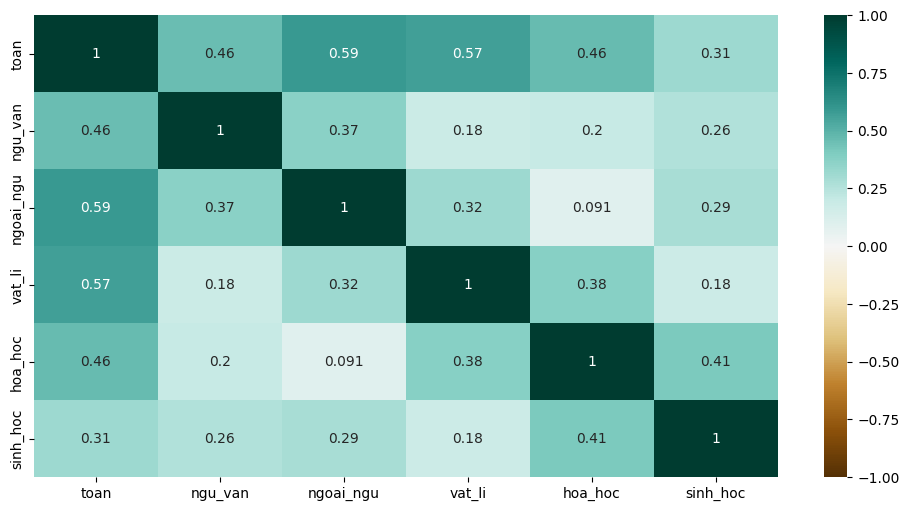

In [19]:
#Hệ số tương quan Correlation Conficicenit
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
sns.heatmap(df[["toan", "ngu_van", "ngoai_ngu", "vat_li", "hoa_hoc", "sinh_hoc"]].corr(), vmin=-1, vmax=1, annot=True , cmap='BrBG')

#